In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

[MAGIC Gamma Telescope Data Set](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope)

Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/content/drive/MyDrive/data/magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)
df["class"].unique()

array([1, 0])

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


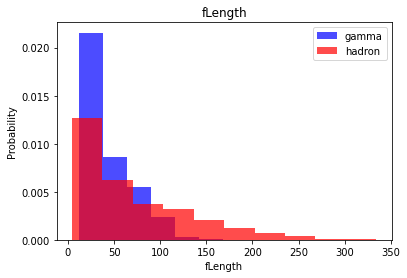

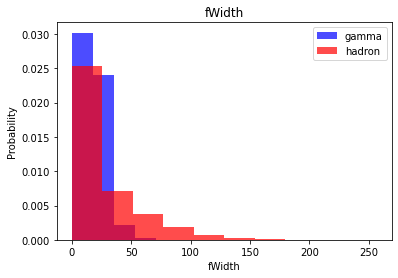

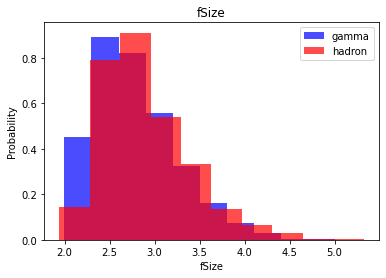

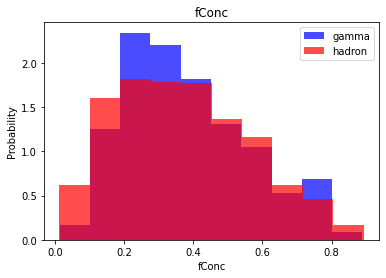

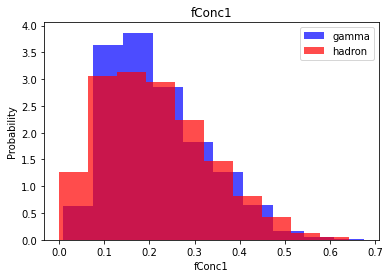

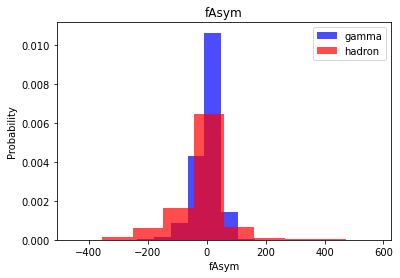

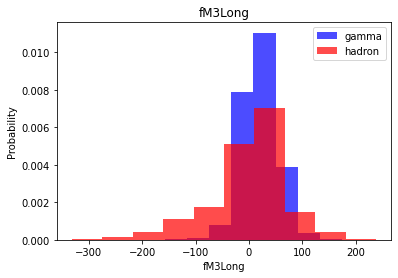

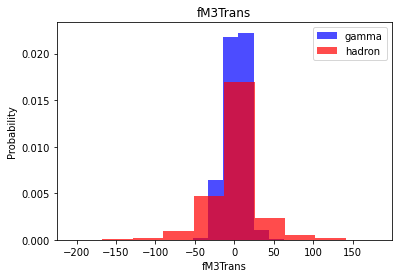

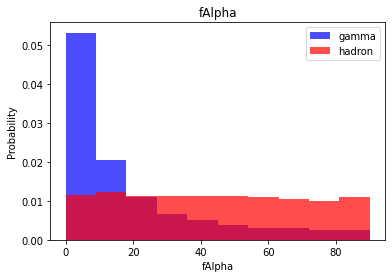

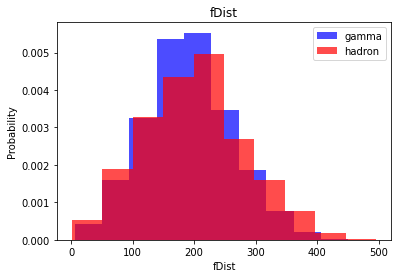

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack( (X, np.reshape(y, (-1, 1))) )

    return data, X, y

In [9]:
print(len(train[train["class"] == 1])) # gamma
print(len(train[train["class"] == 0])) # hadron

7391
4021


In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
train, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
len(y_train)

14782

In [12]:
sum(y_train == 1)

7391

In [13]:
sum(y_train == 0)

7391

# K-Nearest Neighbors (kNN)



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = knn_model.predict(X_test)

[Precision and recall on Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1360
           1       0.85      0.86      0.85      2444

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [18]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [21]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1360
           1       0.73      0.90      0.81      2444

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [24]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1360
           1       0.83      0.83      0.83      2444

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machines (SVM)

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [27]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1360
           1       0.88      0.90      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [28]:
import tensorflow as tf

In [29]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True)

    plt.show()


In [30]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
history = nn_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0 # print or not
)

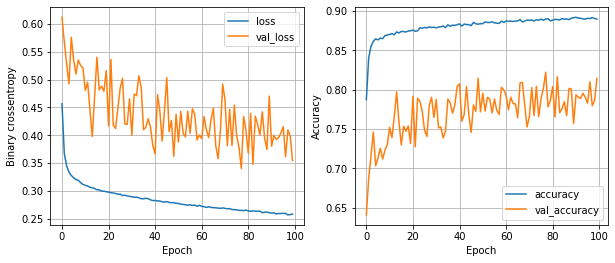

In [32]:
plot_history(history)

In [33]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate), 
        loss="binary_crossentropy", 
        metrics=["accuracy"]
    )

    history = nn_model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0 # print or not
    )

    return nn_model, history

16 nodes, dropout 0, learning rate 0.01, batch size 32


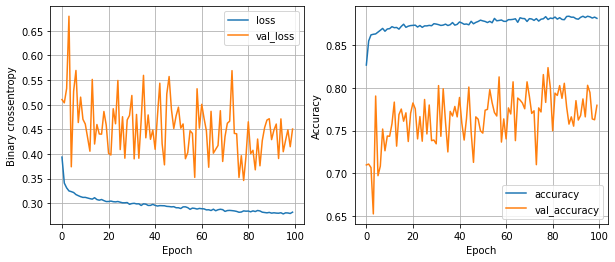

119/119 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8670
16 nodes, dropout 0, learning rate 0.01, batch size 64


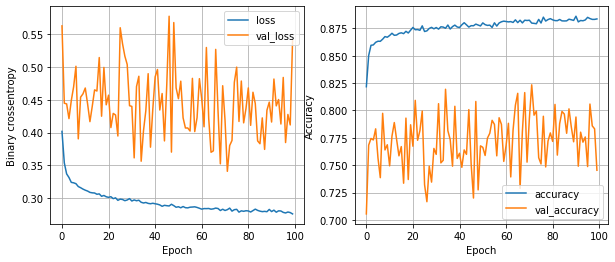

119/119 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8594
16 nodes, dropout 0, learning rate 0.01, batch size 128


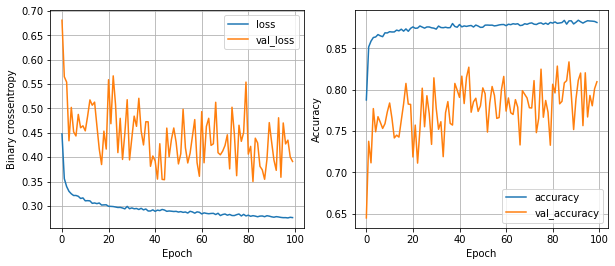

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8649
16 nodes, dropout 0, learning rate 0.005, batch size 32


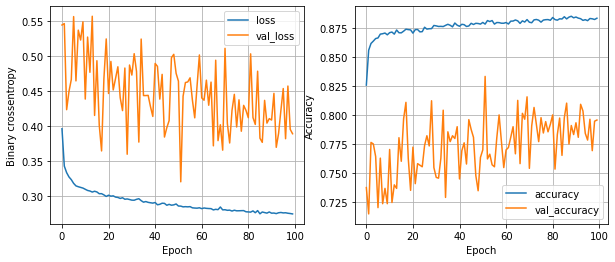

119/119 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8665
16 nodes, dropout 0, learning rate 0.005, batch size 64


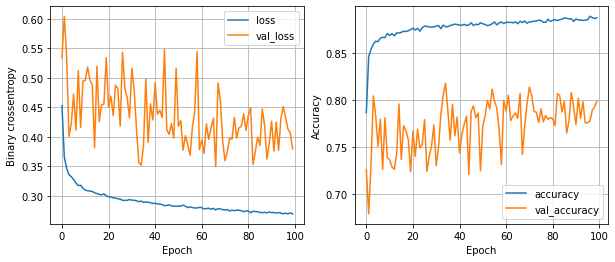

119/119 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8625
16 nodes, dropout 0, learning rate 0.005, batch size 128


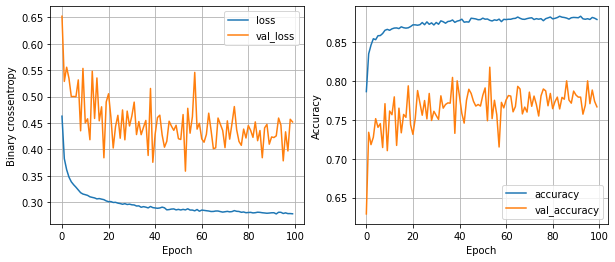

119/119 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8617
16 nodes, dropout 0, learning rate 0.001, batch size 32


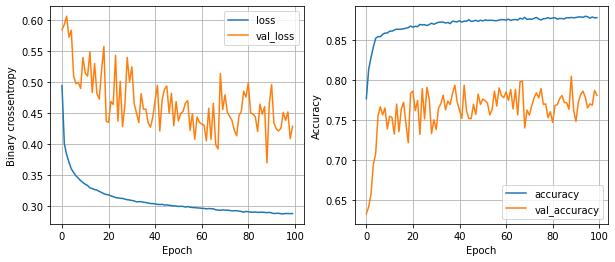

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8659
16 nodes, dropout 0, learning rate 0.001, batch size 64


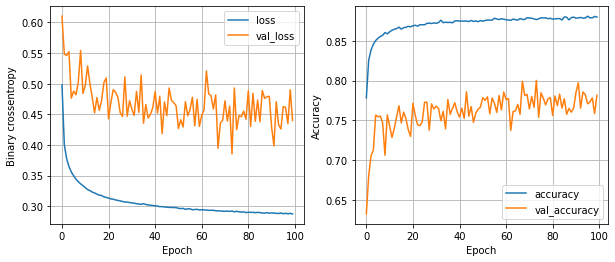

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8630
16 nodes, dropout 0, learning rate 0.001, batch size 128


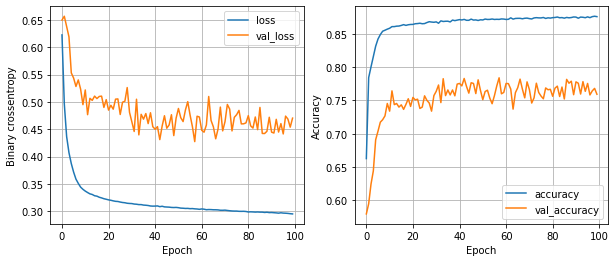

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8646
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


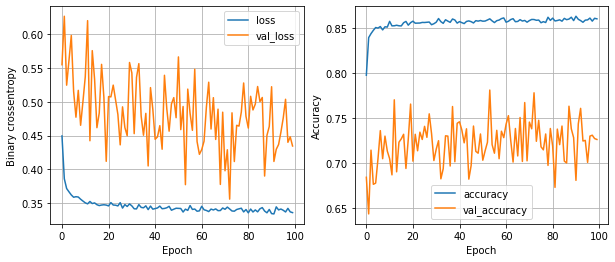

119/119 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8617
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


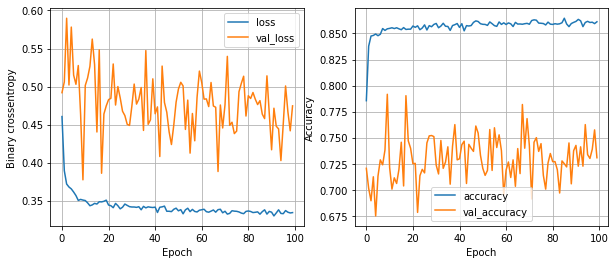

119/119 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8623
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


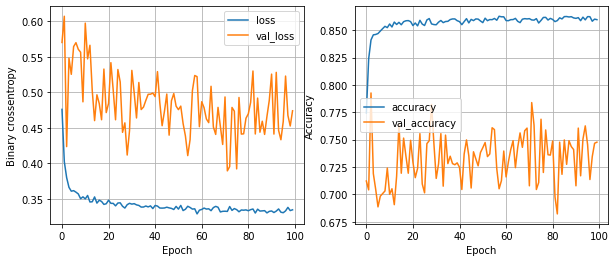

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8670
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


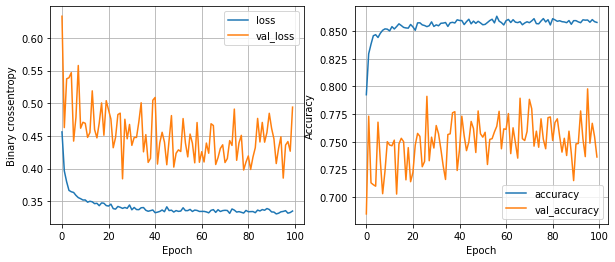

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8620
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


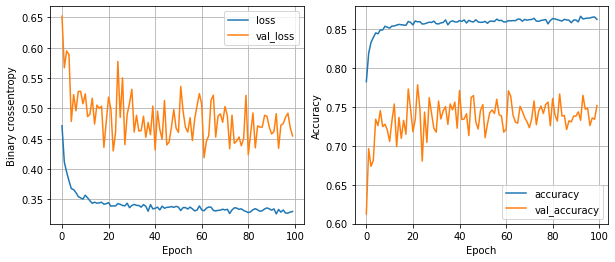

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8678
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


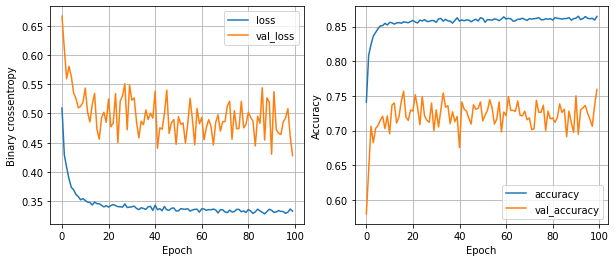

119/119 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8604
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


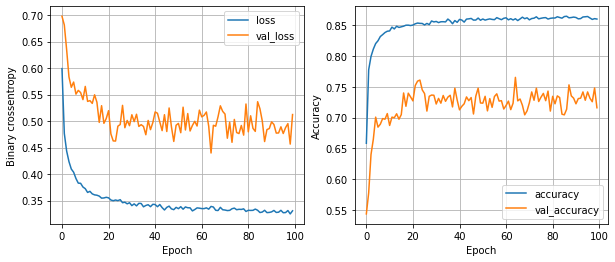

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8675
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


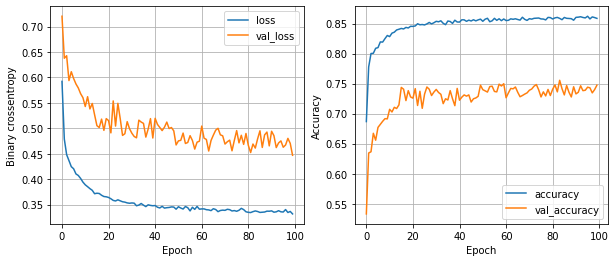

119/119 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8665
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


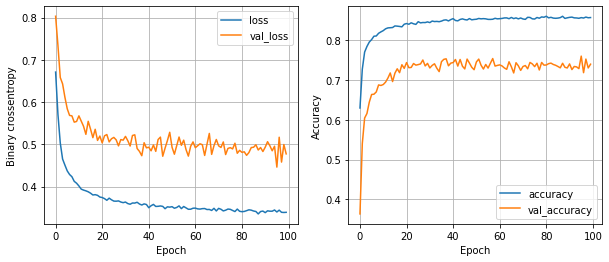

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8588
32 nodes, dropout 0, learning rate 0.01, batch size 32


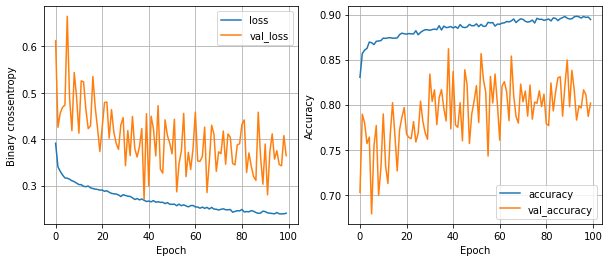

119/119 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8641
32 nodes, dropout 0, learning rate 0.01, batch size 64


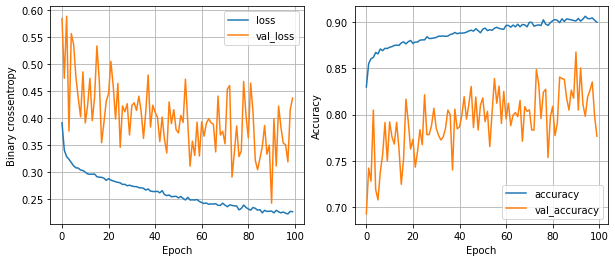

119/119 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8630
32 nodes, dropout 0, learning rate 0.01, batch size 128


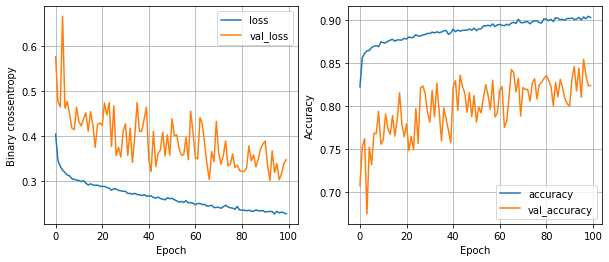

119/119 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8630
32 nodes, dropout 0, learning rate 0.005, batch size 32


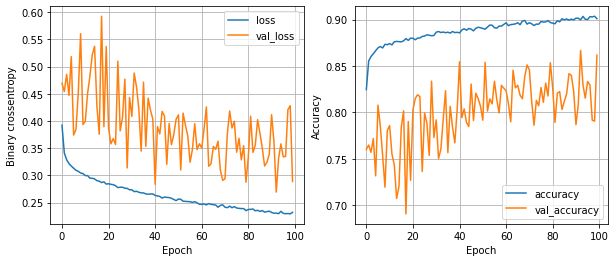

119/119 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8596
32 nodes, dropout 0, learning rate 0.005, batch size 64


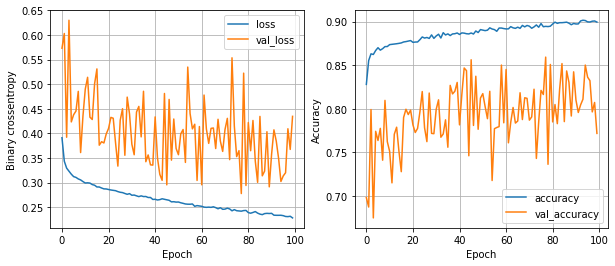

119/119 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8630
32 nodes, dropout 0, learning rate 0.005, batch size 128


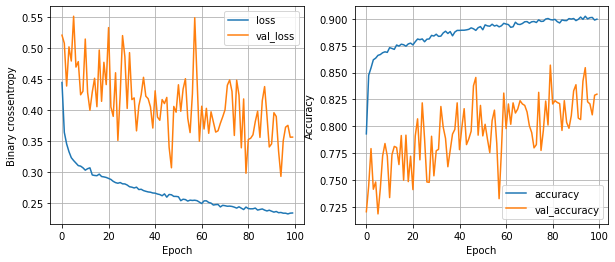

119/119 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8580
32 nodes, dropout 0, learning rate 0.001, batch size 32


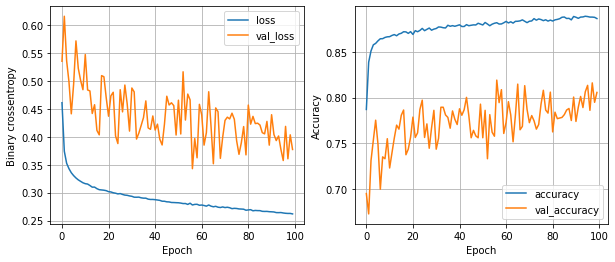

119/119 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8641
32 nodes, dropout 0, learning rate 0.001, batch size 64


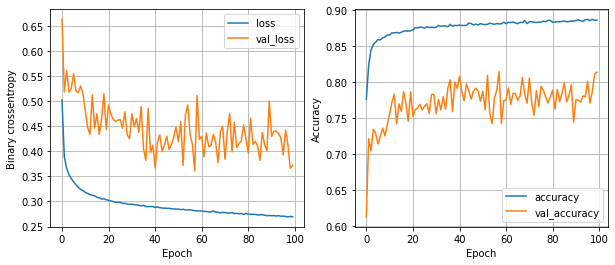

119/119 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8641
32 nodes, dropout 0, learning rate 0.001, batch size 128


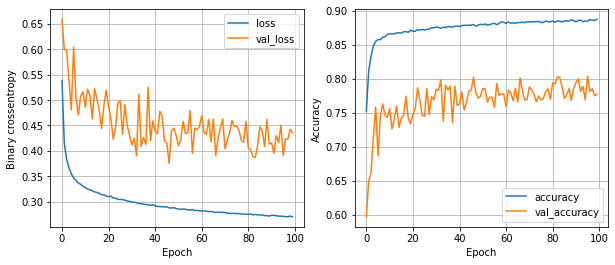

119/119 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8678
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


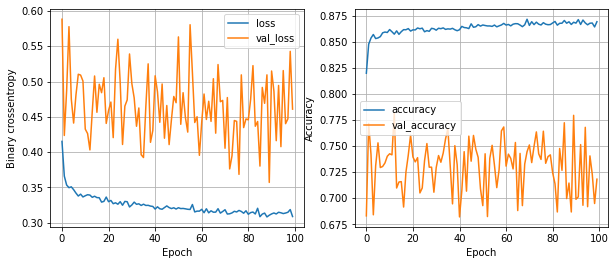

119/119 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8665
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


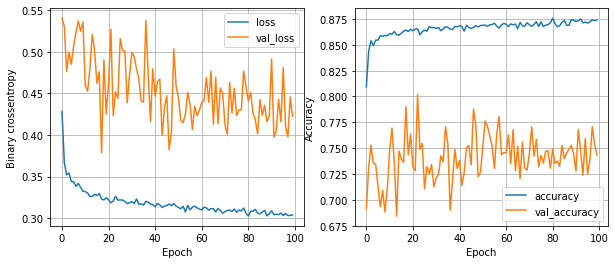

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8688
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


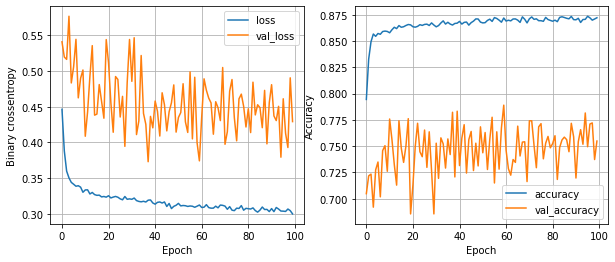

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8733
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


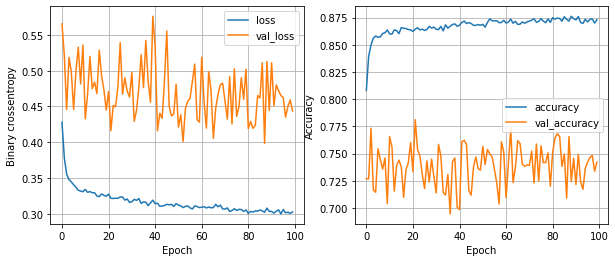

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8680
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


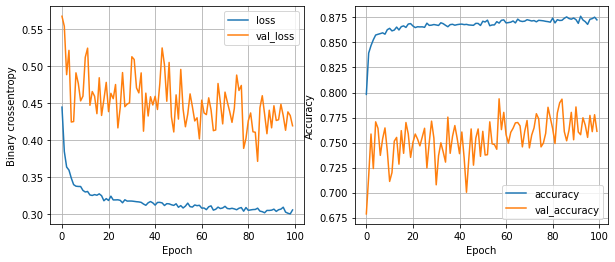

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8670
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


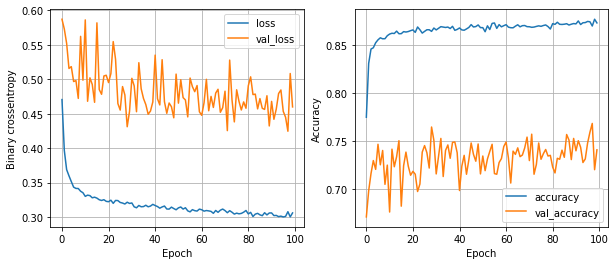

119/119 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8699
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


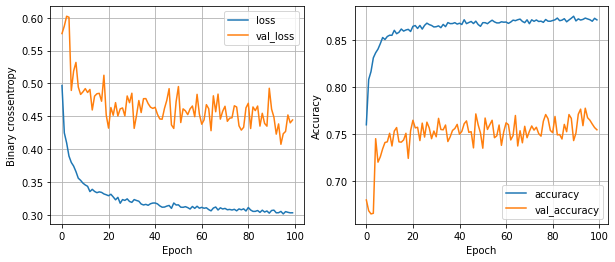

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8657
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


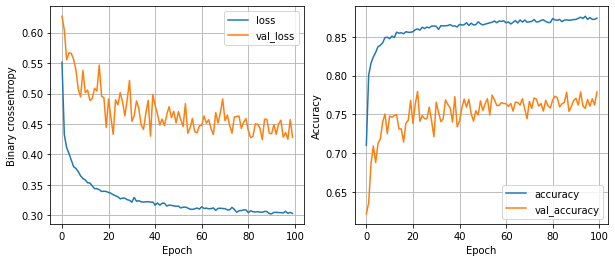

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8659
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


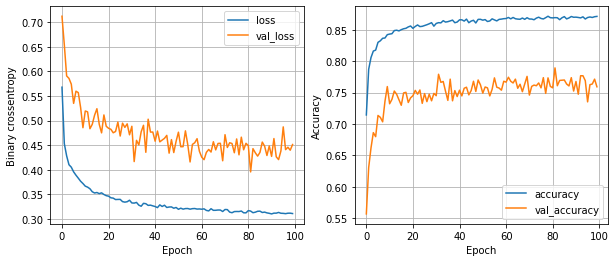

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8665
64 nodes, dropout 0, learning rate 0.01, batch size 32


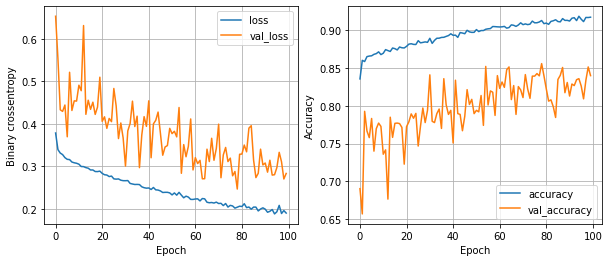

119/119 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8601
64 nodes, dropout 0, learning rate 0.01, batch size 64


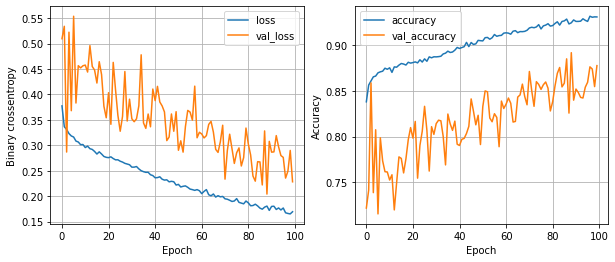

119/119 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.8520
64 nodes, dropout 0, learning rate 0.01, batch size 128


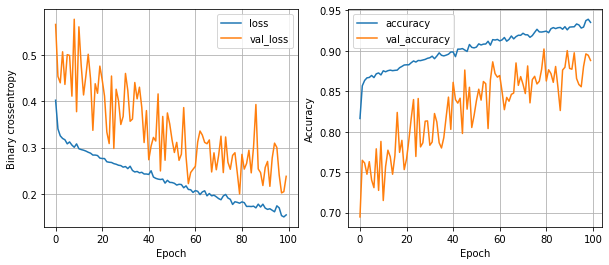

119/119 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.8596
64 nodes, dropout 0, learning rate 0.005, batch size 32


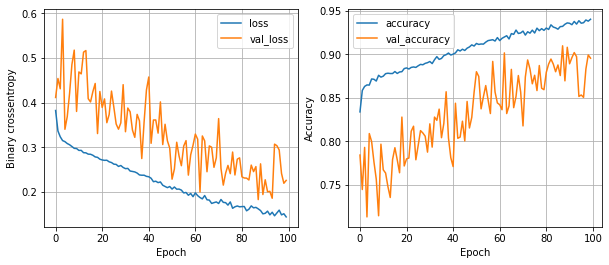

119/119 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.8630
64 nodes, dropout 0, learning rate 0.005, batch size 64


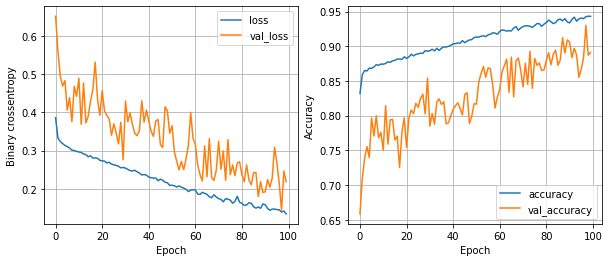

119/119 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.8499
64 nodes, dropout 0, learning rate 0.005, batch size 128


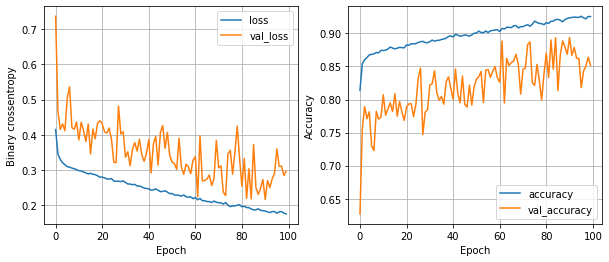

119/119 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8575
64 nodes, dropout 0, learning rate 0.001, batch size 32


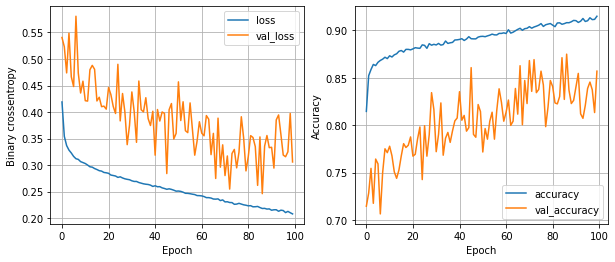

119/119 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8688
64 nodes, dropout 0, learning rate 0.001, batch size 64


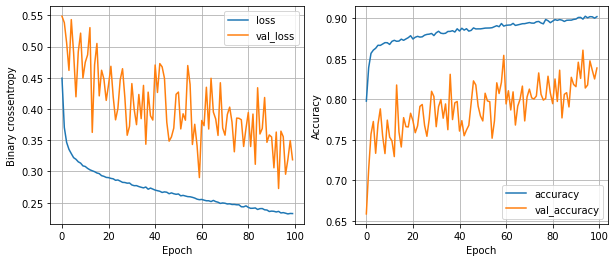

119/119 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8612
64 nodes, dropout 0, learning rate 0.001, batch size 128


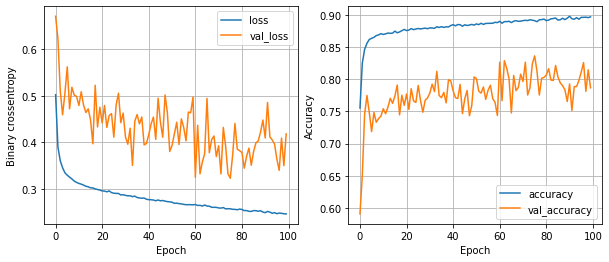

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8688
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


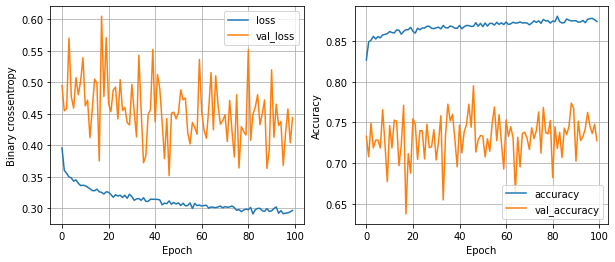

119/119 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8665
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


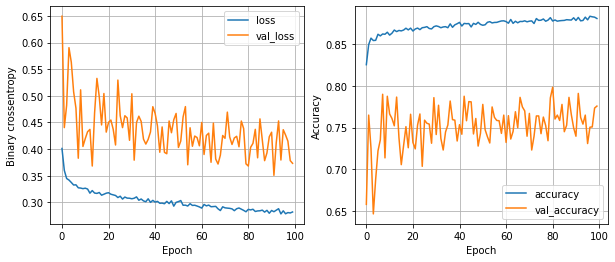

119/119 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8699
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


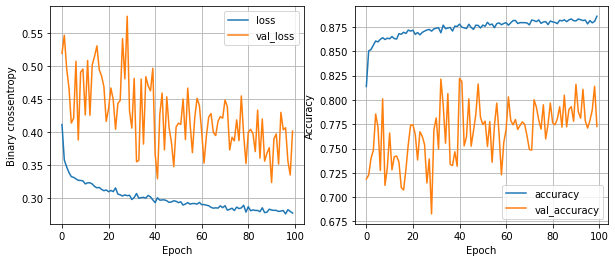

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8696
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


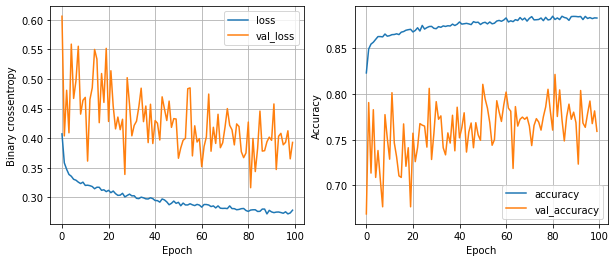

119/119 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8680
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


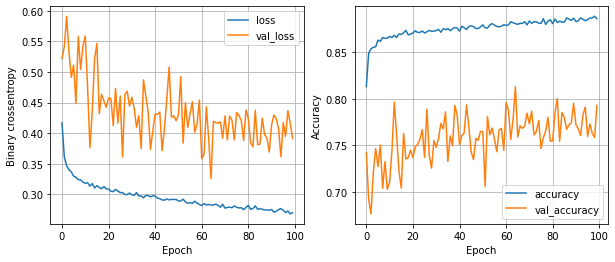

119/119 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8691
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


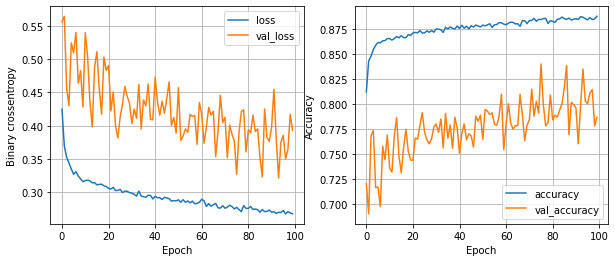

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8715
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


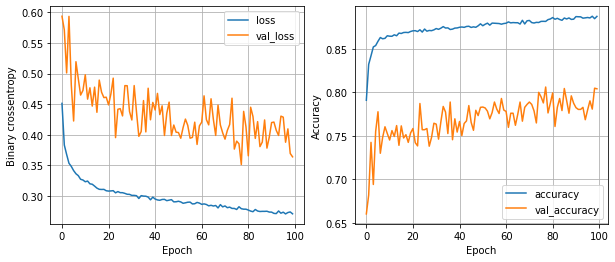

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8686
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


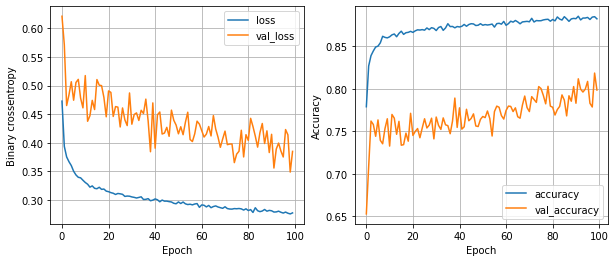

119/119 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8728
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


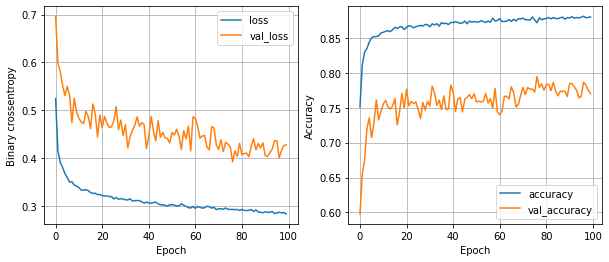

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8701


In [34]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {learning_rate}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [35]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1360
           1       0.88      0.94      0.91      2444

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

